### Bedtools Post Hoc Analysis

In [189]:
# librariesss
import pandas as pd
import math
import scipy
import numpy as np
import pyranges as pr
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [169]:
# load in csv identifying individuals, set directory etc
hg_pop = pd.read_csv('igsr_samples.csv')  
d = pd.DataFrame()
dir = '/home/oona/nsf_grfp/all_bed/intersect'

In [170]:
# for each file in intersection directory, count the number of ancestry groups per segment and add all to dataframe with HGNum IDs
for bed_file in os.listdir(dir):
    filename = os.path.join(dir, bed_file)
    intersect = pr.read_bed(filename, as_df=True)
    switch_cnt = intersect.groupby(['Name'])['ThickEnd'].count().reset_index(name='count')
    # merged_df = pd.merge(intersect, switch_cnt, on=['Name', 'Name'], how='inner')
    switch_cnt['HGNum'] = os.path.basename(filename)
    d = pd.concat([d, switch_cnt])

In [171]:
# replace the _intersect.bed part of the file ID with nothing, only include rows w/switch count greater than one, compress file and save for reference
d['HGNum'] = d['HGNum'].str.replace('_intersect.bed', '', regex=True)
d = d[d['count'] > 1]
# d.to_csv('switch_counts.zip', compression='gzip')

In [172]:
# merge 1000 Genomes identifier csv w/switch count csv we just made to get nationalities, etc for plots
hg_total = pd.merge(d, hg_pop, left_on='HGNum', right_on='Sample name')

In [173]:
# get number of individuals we have overall and per population code (about 10 the bedtools intersection analysis didn't work)
total_num_individuals = hg_total['HGNum'].nunique()
pop_codes = ['ACB', 'ASW', 'CLM', 'MXL', 'PEL', 'PUR', 'UNK']
hg_total[hg_total['Population code']  == pop_codes[5]]['HGNum'].nunique()

104

In [174]:
# get approximate counts by dividing by number of individuals and rounding for now
orig_counts = hg_total.groupby(['Population code'])['count'].sum().reset_index(name='count')
population_counts = orig_counts
population_counts['count'] = round(orig_counts['count'] / [96, 61, 94, 64, 85, 104])
population_counts

,Population code,count
0,ACB,23826.0
1,ASW,10531.0
2,CLM,10913.0
3,MXL,5913.0
4,PEL,7358.0
5,PUR,12673.0


In [175]:
hg_total[hg_total['Sample name'] == 'HG01879']['Name'].nunique()

10779

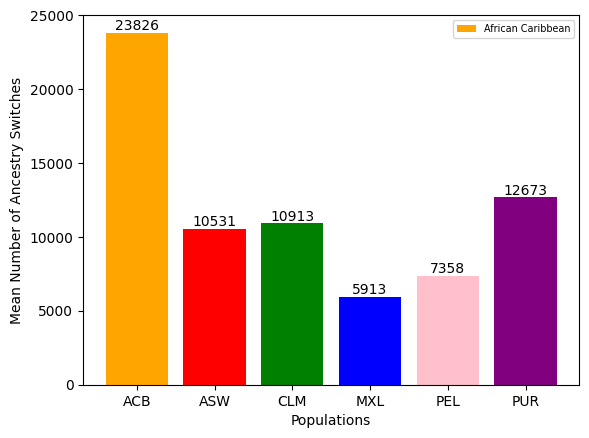

In [188]:
fig, ax = plt.subplots()
my_colors = ['orange', 'red', 'green', 'blue', 'pink', 'purple']
bars = ax.bar(population_counts['Population code'], population_counts['count'], color= my_colors)
# adds counts to top of bar
ax.bar_label(bars) 
acb = mpatches.Patch(color='orange', label='African Caribbean')
asw = mpatches.Patch(color='red', label='African Ancestry SW')
plt.legend(handles=[acb, asw])
# plt.legend(['African Caribbean', 'African Ancestry SW', 'Colombian', 'Mexican Ancestry', 'Peruvian', 'Puerto Rican'], fontsize='x-small')
plt.xlabel("Populations")
plt.ylabel("Mean Number of Ancestry Switches")
plt.savefig("/home/oona/nsf_grfp/figs/seaborn_switch_plot.png")